# Credit Card Fraud Classification

## Scope

Do an exploratory data analysis on the Credit card dataset.

- Understand the overall data

- Do some basic cleaning and rename the columns

- Plot and gather insights

## Summary

- Only 492 fraudulent transactions exist out of entire dataset (0.17% fraud cases). 

- Most of the transaction amounts are relatively small amounts with 90% of transactions being under 200. There are few outliers with over 3000 upto 25700 amount value.

- More than 75% of the fraud transactions occured for low amount transactions under 100. The remaining minority of frauds happen for amounts less than 1000. There were rare cases of frauds for 1500 and 2000 amount range with no frauds happening over the 2500 amount.

- No clear time trend scene expect durations of increased fraud cases during 30-40k as well as 85-100k timestamps.

- Some features are highly skewed.

### Imports

In [1]:
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(f'pandas:{pd.__version__}')
print(f'seaborn:{sns.__version__}')
print(f'python:{sys.version}')

pandas:2.0.1
seaborn:0.12.2
python:3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]


## Path

<ins>**Change the BASE path to your folder location**</ins>

In [3]:
BASE = r"C:\\Users\\anand\\Documents\\Credit_card_fraud_detection"

PATH = BASE + r"\\data\\raw\\"

EXPORT = BASE + r"\\data\\processed\\"

## Read Data

In [4]:
# Read excel
df = pd.read_csv(PATH + r"creditcard.csv")

# Preview
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
# Shape of data
df.shape

(284807, 31)

In [6]:
# Preview columns
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [7]:
# Mean and quantiles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
# Check for null values
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

No null values

## EDA 

In [9]:
# Select relevant columns for EDA
cols = [
    'Time',
    'Amount',
    'Class'
]

In [10]:
# Filter columns
df1 = df[cols]

# Preview
df1.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [11]:
# Value count
df1.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Only 492 fraudulent transactions exist out of entire dataset.

In [12]:
# Quantiles
df1['Amount'].quantile([0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999,0.9999,1])

0.0010        0.000000
0.0100        0.120000
0.1000        1.000000
0.2500        5.600000
0.5000       22.000000
0.7500       77.165000
0.9000      203.000000
0.9900     1017.970000
0.9990     3000.000000
0.9999     6483.961444
1.0000    25691.160000
Name: Amount, dtype: float64

In [13]:
# Mean amount
df1.Amount.mean()

88.34961925093133

Most of the transaction amounts are relatively small amounts with 90% of transactions being under 200. There are few outliers with over 3000 upto 25700 amount value.

In [14]:
# Number of transactions with Amount 0
df1[df1.Amount == 0].shape[0]

1825

There are significant amount of transactions where no money was transferred.

In [15]:
# Number of transactions with amount > 1000
df1[df1.Amount>1000].shape[0]

2940

In [16]:
# Amount >10000
df1[df1.Amount>10000]

,Time,Amount,Class
46841,42951.0,12910.93,0
54018,46253.0,11898.09,0
58465,48401.0,19656.53,0
151296,95286.0,18910.00,0
169457,119713.0,11789.84,0
274771,166198.0,25691.16,0
284249,172273.0,10199.44,0


No fraud for the extremely high amount transactions.

In [17]:
# Number of fraud transactions with amount > 1000 
df1[(df1.Amount>1000) & (df1.Class ==1)]

,Time,Amount,Class
6971,9064.0,1809.68,1
10690,18088.0,1218.89,1
81609,59011.0,1389.56,1
89190,62467.0,1402.16,1
95597,65385.0,1354.25,1
176049,122608.0,2125.87,1
199896,133184.0,1335.00,1
249167,154278.0,1504.93,1
249239,154309.0,1096.99,1


There are 9 fraud cases with high amount transaction of oer 1000.

In [18]:
# Filter by fraud transactions
fraud = df1[df1.Class == 1]

# Preview
fraud.head()

,Time,Amount,Class
541,406.0,0.00,1
623,472.0,529.00,1
4920,4462.0,239.93,1
6108,6986.0,59.00,1
6329,7519.0,1.00,1


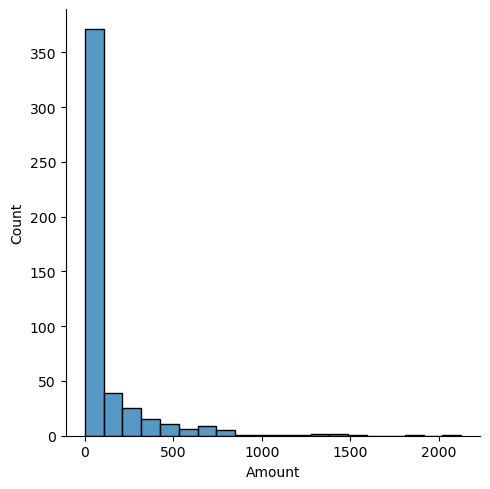

In [19]:
# Histogram of fraud amount
sns.displot(data=fraud, x='Amount', bins = 20)

It is clear that more than 75% of the fraud transactions occured for low amount transactions under 100. The remaining minority of frauds happen for amounts less than 1000. There were rare cases of frauds for 1500 and 2000 amount range with no frauds happening over the 2500 amount.

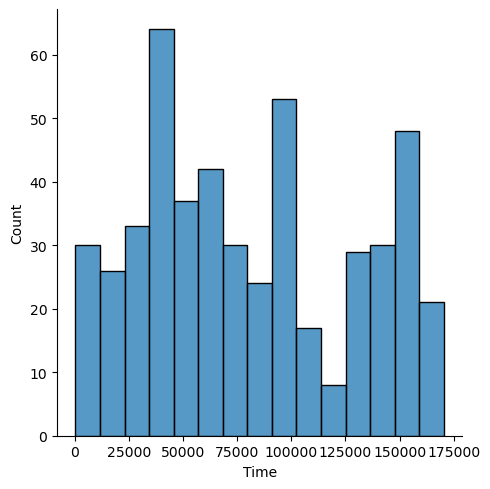

In [20]:
# Histogram of fraud time
sns.displot(data=fraud, x='Time', bins = 15)

No clear time trend scene expect durations of increased fraud cases during 30-40k as well as 85-100k timestamps. 

In [21]:
# Fraud transactions between time period
fraud[(fraud.Time > 25000) & (fraud.Time <50000)].shape[0]

108

In [22]:
# Unique time periods of fraud
fraud[(fraud.Time > 25000) & (fraud.Time <50000)].Time.unique().astype(int)

array([25095, 25198, 25231, 25254, 25426, 26523, 26556, 26585, 26833,
       26863, 26899, 26931, 26961, 27163, 27187, 27219, 27252, 27784,
       28143, 28242, 28625, 28658, 28692, 28726, 28755, 29526, 29531,
       29753, 29785, 30852, 32686, 32745, 34256, 34521, 34634, 34684,
       34687, 35585, 35771, 35866, 35899, 35906, 35926, 35942, 35953,
       36170, 37167, 39729, 40086, 40276, 40662, 40742, 40892, 40918,
       40919, 41116, 41138, 41147, 41164, 41170, 41181, 41194, 41203,
       41204, 41227, 41233, 41237, 41243, 41273, 41285, 41305, 41308,
       41313, 41353, 41397, 41413, 41505, 41582, 41607, 41646, 41743,
       41791, 41851, 41870, 41991, 42247, 42474, 42985, 42988, 43028,
       43369, 43494, 44393, 44532, 45463, 45501, 45541, 46057, 46149,
       46925, 47545, 47826, 47923, 47982, 48380, 48533, 48884, 49985])

In [23]:
# Unique amount values of fraud
fraud[(fraud.Time > 25000) & (fraud.Time <50000)].Amount.unique().astype(int)

array([  3,  99,   3,  23, 730,   0,  30, 104,   0, 717,  19,   1,  18,
       125,   0,  60,   7,   1,   9,   4,  14, 111,  12, 776, 112,   3,
       340,  88,   5,  83,  11,  30, 459, 118,  45, 173,  37,  59,   9,
        34, 273, 106, 364,  39,  53, 172, 802, 139, 648, 204,  88,  24,
       105,   7, 208,  19, 360])

In [24]:
# Fraud transactions between time period
fraud[(fraud.Time > 75000) & (fraud.Time <100000)].shape[0]

86

In [25]:
# Unique time periods of fraud
fraud[(fraud.Time > 75000) & (fraud.Time <100000)].Time.unique().astype(int)

array([75033, 75556, 75581, 75851, 75978, 76575, 76826, 76845, 76857,
       76867, 76876, 77154, 77171, 77182, 77202, 77627, 78725, 79540,
       81372, 82289, 83934, 84204, 84694, 84789, 85181, 85285, 85573,
       85576, 85864, 85867, 86376, 87202, 87883, 88672, 88737, 90676,
       91075, 91407, 91502, 91524, 91554, 92092, 92102, 93742, 93823,
       93824, 93834, 93853, 93856, 93860, 93879, 93888, 93897, 93904,
       93920, 93965, 94141, 94362, 94364, 94625, 94952, 95559, 95628,
       96135, 96291, 96717, 97121, 97235])

In [26]:
# Unique amount values of fraud
fraud[(fraud.Time > 75000) & (fraud.Time <100000)].Amount.unique().astype(int)

array([ 30,  29, 124,  99,  99, 219, 254,   1, 129, 106,  60,   0,   7,
         0, 512,  12, 354,   2, 252, 240, 310, 323, 451, 829,   1,   9,
         6,  38,  52, 261,  18, 600,  75,   8,   0,  44, 316, 209,  78,
       188,  30, 104,  37,  97,  11,  45,  33, 571,   1,  18,  33,   8,
         9])

### Skewness

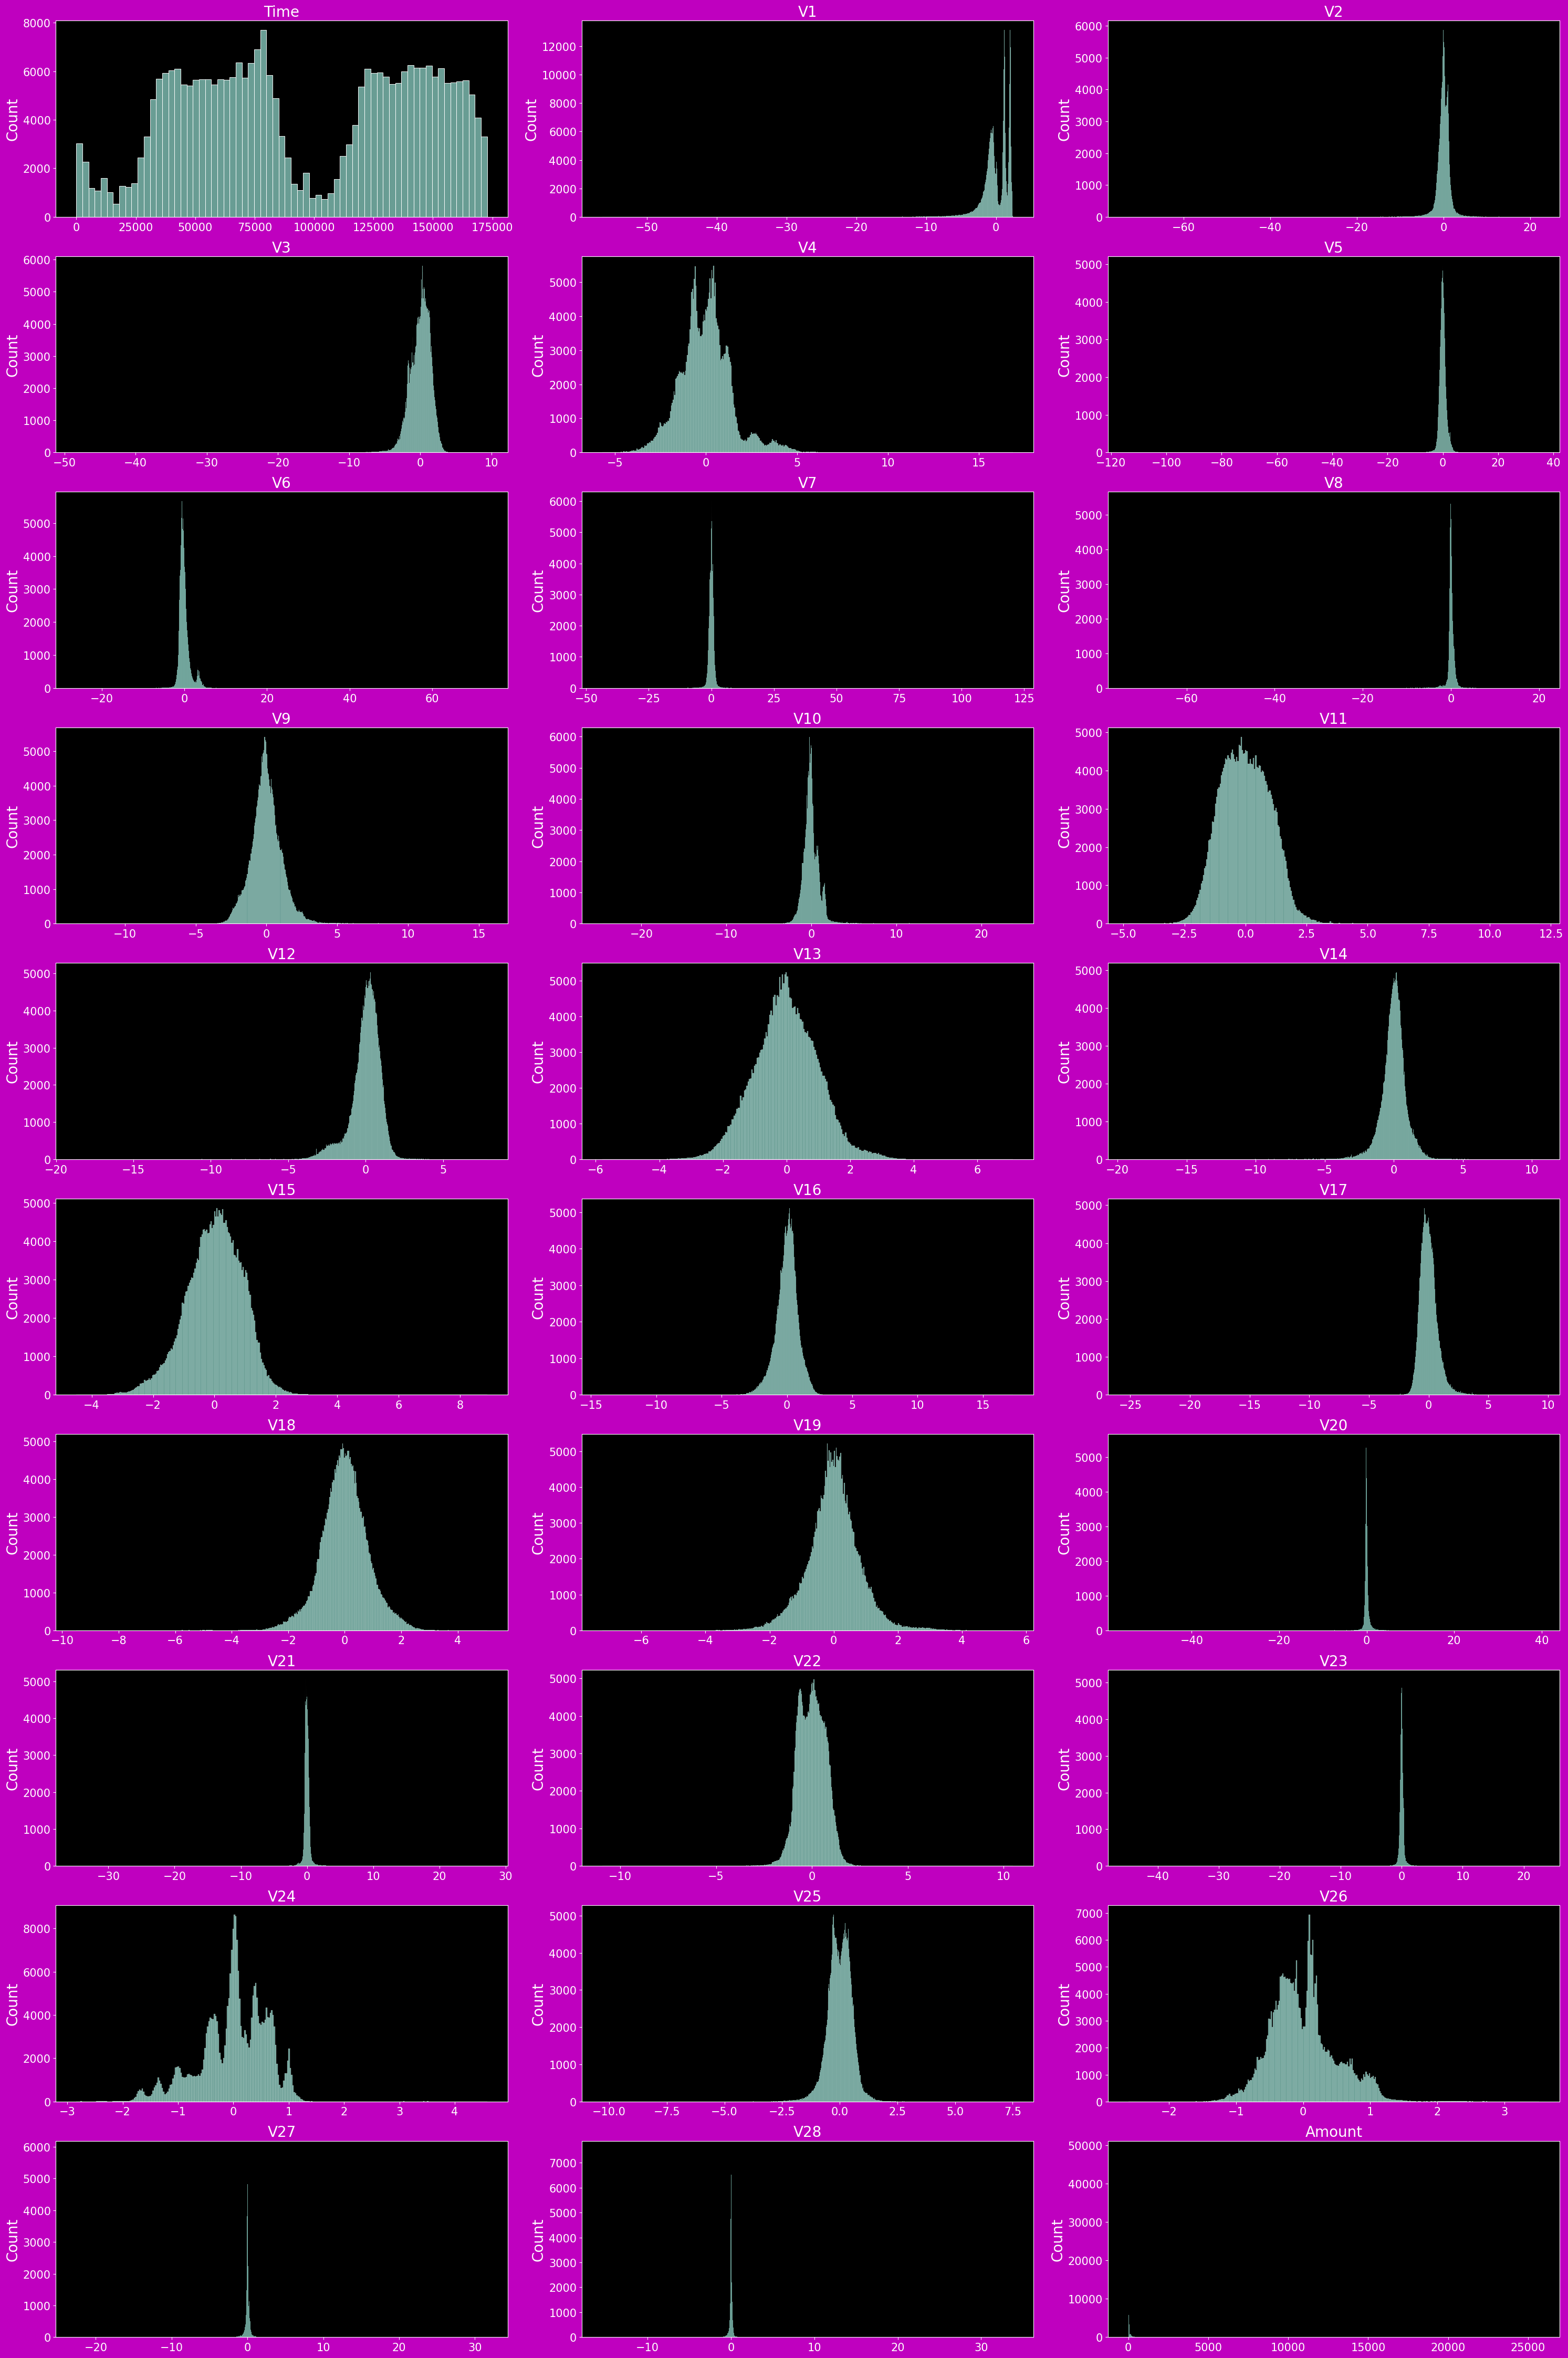

In [27]:
var = df.columns

with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(df[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20) 
            ax.set_ylabel("Count", fontsize=20)  # set ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15) 
            ax.set_xlabel('') # set empty string as x label of the subplot

    plt.tight_layout()
    plt.show()

Some of the features have high level of skewness.